In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
df = pd.read_csv('bakimdurusanalizyapilacak.csv', delimiter=';', skiprows=0, low_memory=False)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Makine                     2000 non-null   object
 1   Stok kodu                  2000 non-null   object
 2   Başlangıç Tarih            2000 non-null   object
 3   Bitiş Tarih                2000 non-null   object
 4   Personel                   2000 non-null   object
 5   Arıza Grup 1               2000 non-null   object
 6   Arıza Grup 2               2000 non-null   object
 7   Arıza Grup 3               1242 non-null   object
 8   Çalışma Süresi(Dk) Toplam  2000 non-null   int64 
 9   yıl                        2000 non-null   int64 
 10  tezgah                     2000 non-null   object
dtypes: int64(2), object(9)
memory usage: 172.0+ KB
None


,Makine,Stok kodu,Başlangıç Tarih,Bitiş Tarih,Personel,Arıza Grup 1,Arıza Grup 2,Arıza Grup 3,Çalışma Süresi(Dk) Toplam,yıl,tezgah
0,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 03:52,12.01.2018 03:59,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,7,2018,C 02
1,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 04:00,12.01.2018 04:02,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,2,2018,C 02
2,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 04:02,12.01.2018 04:22,GÖKHAN GÖK,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK",20,2018,C 02
3,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,5.02.2018 23:40,5.02.2018 23:57,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,17,2018,C 02
4,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,30.03.2018 14:22,30.03.2018 14:33,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,11,2018,C 02


In [2]:
#hedef değişken duruş süresini ayırıyorum ve incelyorum

X = df.drop(['Çalışma Süresi(Dk) Toplam'], axis=1)
y = df['Çalışma Süresi(Dk) Toplam']
print('Durma süresi:')
print(y.value_counts())
y = np.where(df['Çalışma Süresi(Dk) Toplam'] ==59,0,1)

Durma süresi:
59      685
1       100
2        67
8        55
4        49
       ... 
123       1
132       1
134       1
138       1
1732      1
Name: Çalışma Süresi(Dk) Toplam, Length: 119, dtype: int64


In [3]:
#Veri tipi ‘object’ olan sütunlar seçilir.
#Bu sütunlar yine o sütunun mode() değeriyle doldurulur.

categorical_columns = [c for c in X.columns  if X[c].dtype.name == 'object']
for c in categorical_columns:
    X[c] = np.where(X[c] ==' ', df[c], X[c].mode())
X.select_dtypes(include='object').tail(10)

ValueError: operands could not be broadcast together with shapes (2000,) (2000,) (3,) 

In [4]:

#Makine öğrenmesi modelleri kategorik değişkenleri algılayamadığı için ‘object’ tipindeki değişkenleri one-hot-encoding yöntemiyle 0 ve 1'lere ayırıyoruz.

X = pd.concat([X, pd.get_dummies(X.select_dtypes(include='object'))], axis=1)
X = X.drop(["Makine","Stok kodu","Başlangıç Tarih","Bitiş Tarih","Personel","Arıza Grup 1","Arıza Grup 2","Arıza Grup 3","yıl","tezgah"], axis=1)
X.head()

,Makine_(C 112) MAZAK HCN-6800 II (YİM),"Stok kodu_9,13E+19",Başlangıç Tarih_1.03.2018 03:30,Başlangıç Tarih_1.03.2018 03:38,Başlangıç Tarih_1.07.2018 04:48,Başlangıç Tarih_1.07.2018 04:55,Başlangıç Tarih_1.07.2018 19:58,Başlangıç Tarih_1.07.2018 20:00,Başlangıç Tarih_1.07.2018 20:03,Başlangıç Tarih_1.08.2018 12:24,...,tezgah_C 100,tezgah_C 101,tezgah_C 102,tezgah_C 103,tezgah_C 105,tezgah_C 107,tezgah_C 108,tezgah_C 109,tezgah_C 110,tezgah_C 112
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Veriyi eğitim ve test alt-veri gruplarına ayırma.
#Karar ağacı modeli oluşturma.
#Modeli eğitim verisine ‘fit’ etme.


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
d_tree1 = DecisionTreeClassifier(max_depth = 2, random_state=48)
d_tree1.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=48)

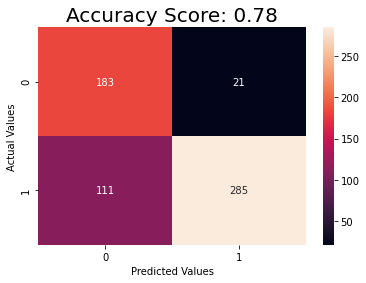

In [6]:
# Görmediğimiz test verisine modele verip tahminde bulunma.
#Modelin başarı metrikleri: Confusion matrix


predictions = d_tree1.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 20)
plt.show()

In [7]:
#Modelin başarı metrikleri: Precision, recall, f1-score

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['=59', '!59']))

              precision    recall  f1-score   support

         =59       0.62      0.90      0.73       204
         !59       0.93      0.72      0.81       396

    accuracy                           0.78       600
   macro avg       0.78      0.81      0.77       600
weighted avg       0.83      0.78      0.79       600



In [8]:
# Karar ağacını görselleştirme

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier

graph = Source(tree.export_graphviz(d_tree, out_file=None,feature_names=X.columns, filled = True))
display(SVG(graph.pipe(format='svg')))

NameError: name 'd_tree' is not defined

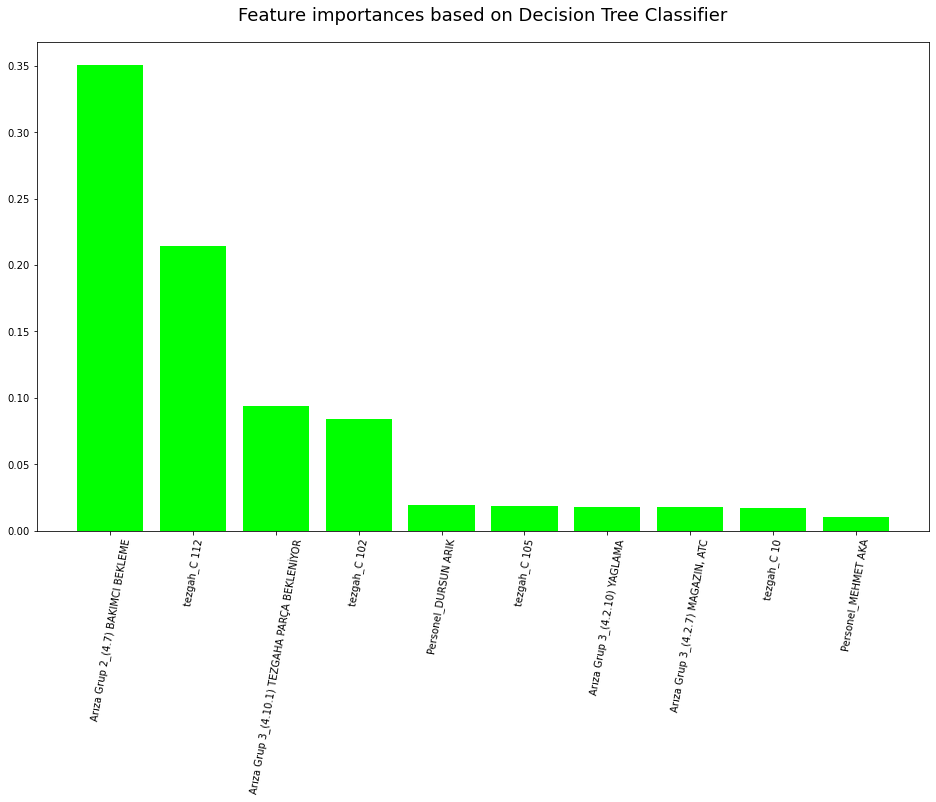

In [9]:
#7. Modelin özniteliklerinin önem sıralamasını analiz etme.
plt.figure(figsize=(16, 9))

from sklearn import ensemble

d_tree2 = DecisionTreeClassifier(max_depth = 8, random_state=42)
d_tree2.fit(X_train, y_train)
ranking = d_tree2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Feature importances based on Decision Tree Classifier", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()